In [35]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

# Load the dataset, skipping the header row
dataset = np.loadtxt('diabetes.csv', delimiter=',', skiprows=1)
print(dataset)
# Separate features X and target y
X = dataset[:, 0:8]
y = dataset[:, 8]

print(f"Features shape: {X.shape}, Target shape: {y.shape}")
print("INPUT",X)
print("OUTPUT",y)


[[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]
Features shape: (768, 8), Target shape: (768,)
INPUT [[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
OUTPUT [1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 

In [36]:
model=Sequential()
model.add(Dense(12,input_dim=8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.fit(X,y,epochs=100,batch_size=20)
_,accuracy=model.evaluate(X,y)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3724 - loss: 20.2405
Epoch 2/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5216 - loss: 5.9534
Epoch 3/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5216 - loss: 2.2786
Epoch 4/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5695 - loss: 0.9943
Epoch 5/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6364 - loss: 0.8172
Epoch 6/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6497 - loss: 0.7843
Epoch 7/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6150 - loss: 0.7937
Epoch 8/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6274 - loss: 0.7952
Epoch 9/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6277 - loss: 0.7584
Epoch 10/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6055 - loss: 0.7344
Epoch 11/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6352 - loss: 0.7348
Epoch 12/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6374 - l

In [37]:
#model save
model_json=model.to_json()
with open("model.json","w") as json_file:
  json_file.write(model_json)
model.save_weights("model.weights.h5")
print("saved model to disk")


saved model to disk


**Traning completed now time to test it**

In [38]:
from numpy import loadtxt
from keras.models import model_from_json

In [39]:
dataset=loadtxt('diabetes.csv',delimiter=',',skiprows=1)
X=dataset[:,0:8]
y=dataset[:,8]

In [40]:
json_file=open('model.json','r')
loaded_model_json=json_file.read()
json_file.close()
loaded_model=model_from_json(loaded_model_json)
loaded_model.load_weights("model.weights.h5")
print("loaded model from disk")

loaded model from disk


In [41]:
predictions = model.predict(X)
predicted_classes = (predictions > 0.5).astype(int)
for i in range(len(X)):
    print(f"{X[i].tolist()} => {predicted_classes[i][0]} (expected {y[i]})")

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0] => 1 (expected 1.0)
[1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0] => 0 (expected 0.0)
[8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0] => 1 (expected 1.0)
[1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0] => 0 (expected 0.0)
[0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288, 33.0] => 1 (expected 1.0)
[5.0, 116.0, 74.0, 0.0, 0.0, 25.6, 0.201, 30.0] => 0 (expected 0.0)
[3.0, 78.0, 50.0, 32.0, 88.0, 31.0, 0.248, 26.0] => 0 (expected 1.0)
[10.0, 115.0, 0.0, 0.0, 0.0, 35.3, 0.134, 29.0] => 1 (expected 0.0)
[2.0, 197.0, 70.0, 45.0, 543.0, 30.5, 0.158, 53.0] => 1 (expected 1.0)
[8.0, 125.0, 96.0, 0.0, 0.0, 0.0, 0.232, 54.0] => 0 (expected 1.0)
[4.0, 110.0, 92.0, 0.0, 0.0, 37.6, 0.191, 30.0] => 0 (expected 0.0)
[10.0, 168.0, 74.0, 0.0, 0.0, 38.0, 0.537, 34.0] => 1 (expected 1.0)
[10.0, 139.0, 80.0, 0.0, 0.0, 27.1, 1.441, 57.0] => 0 (expected 0.0)
[1.0, 189.0, 60.0, 23.0, 846.0, 30.1, 0.398, 59.0] => 1 (expected 

In [58]:
import pandas as pd
results_df = pd.DataFrame(X, columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                                           'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
results_df['Predicted'] = predicted_classes
results_df['Expected'] = y

results_df['Predicted'] = results_df['Predicted'].map({0: 'No Diabetes', 1: 'Diabetes'})
results_df['Expected'] = results_df['Expected'].map({0.0: 'No Diabetes', 1.0: 'Diabetes'})
print(results_df)


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0    148.0           72.0           35.0      0.0  33.6   
1            1.0     85.0           66.0           29.0      0.0  26.6   
2            8.0    183.0           64.0            0.0      0.0  23.3   
3            1.0     89.0           66.0           23.0     94.0  28.1   
4            0.0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763         10.0    101.0           76.0           48.0    180.0  32.9   
764          2.0    122.0           70.0           27.0      0.0  36.8   
765          5.0    121.0           72.0           23.0    112.0  26.2   
766          1.0    126.0           60.0            0.0      0.0  30.1   
767          1.0     93.0           70.0           31.0      0.0  30.4   

     DiabetesPedigreeFunction   Age    Predicted     Expected  
0                       0.627  50.0     Diabete

In [59]:
print("\nPredictions Results:\n")
print(f"{'Features':<80} {'Predicted':<15} {'Expected':<15}")
print("=" * 110)

for i in range(len(X)):
    features_str = ', '.join([f'{feature:.1f}' for feature in X[i]])
    print(f"{features_str:<80} {results_df['Predicted'][i]:<15} {results_df['Expected'][i]:<15}")



Predictions Results:

Features                                                                         Predicted       Expected       
6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.6, 50.0                                     Diabetes        Diabetes       
1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.4, 31.0                                      No Diabetes     No Diabetes    
8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.7, 32.0                                      Diabetes        Diabetes       
1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.2, 21.0                                     No Diabetes     No Diabetes    
0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.3, 33.0                                   Diabetes        Diabetes       
5.0, 116.0, 74.0, 0.0, 0.0, 25.6, 0.2, 30.0                                      No Diabetes     No Diabetes    
3.0, 78.0, 50.0, 32.0, 88.0, 31.0, 0.2, 26.0                                     No Diabetes     Diabetes       
10.0, 115.0, 0.0, 0.0, 0.0, 35.3, 0.1, 29.0                              

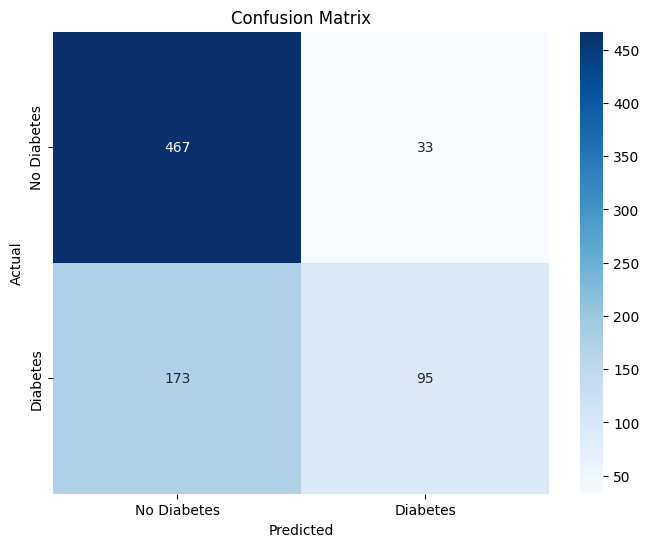

In [60]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y, predicted_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


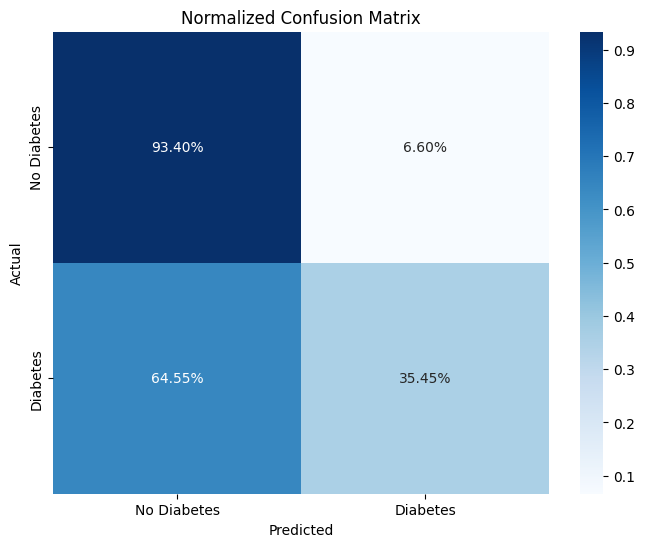

In [61]:
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Blues',xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Normalized Confusion Matrix')
plt.show()


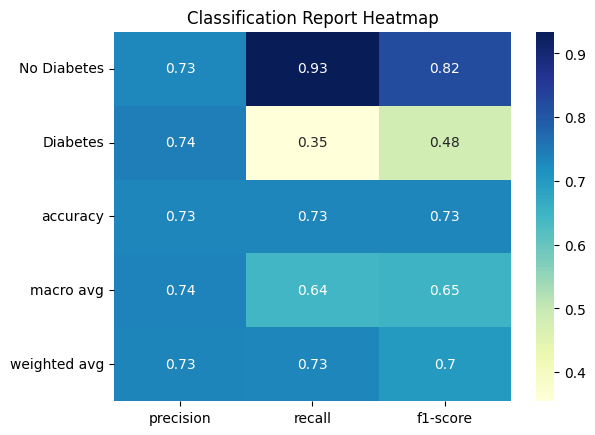

In [62]:
from sklearn.metrics import classification_report

report = classification_report(y, predicted_classes, target_names=['No Diabetes', 'Diabetes'], output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='YlGnBu')
plt.title('Classification Report Heatmap')
plt.show()
